<a href="https://colab.research.google.com/github/hajihye123/MachineLearning_Lecture/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_6%EC%9D%BC%EC%B0%A8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [2]:
from sklearn.model_selection import train_test_split

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
len(pca.explained_variance_ratio_)

784

In [6]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum[:10]

array([0.09755018, 0.16895215, 0.23069951, 0.28477054, 0.33351692,
       0.37634703, 0.409106  , 0.43790154, 0.46542889, 0.48890763])

In [7]:
d = np.argmax(cumsum >= 0.95) + 1

In [8]:
d

154

In [9]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)

In [10]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [11]:
X_recovered = pca.inverse_transform(X_reduced)

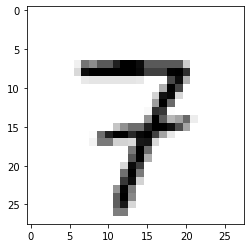

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.imshow(X_train[0].reshape(28, 28), cmap=mpl.cm.binary)
plt.show()

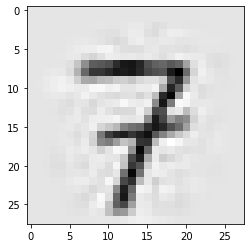

In [13]:
plt.imshow(X_recovered[0].reshape(28, 28), cmap=mpl.cm.binary)
plt.show()

In [14]:
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [15]:
X[0]

array([-3.29677117,  4.26198454,  7.69787682])

In [16]:
y[0]

8.242346437921256

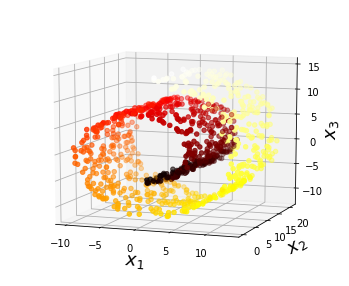

In [18]:
# 매니폴드 학습
# 스위스 롤

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111,  projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.hot)
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.set_zlabel('$x_3$', fontsize=18)
ax.view_init(10, -70)
plt.show()

In [19]:
# 커널 PCA

from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04) # kernel = ['linear', 'sigmoid']
#rbf_pca = KernelPCA(n_components=2, kernel='linear')
#rbf_pca = KernelPCA(n_components=2, kernel='sigmoid')
X_reduced = rbf_pca.fit_transform(X)

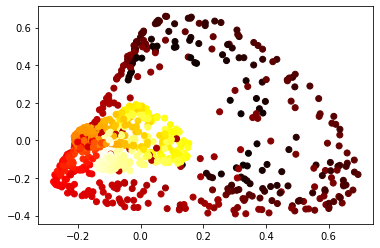

In [20]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)
plt.show() # RBF kernel, gamma=0.04

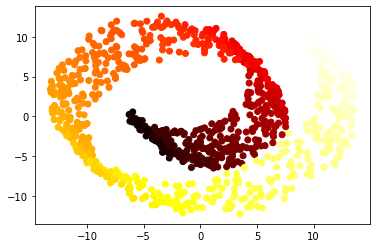

In [22]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel='linear')
X_reduced = lin_pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)
plt.show() # Linear kernel

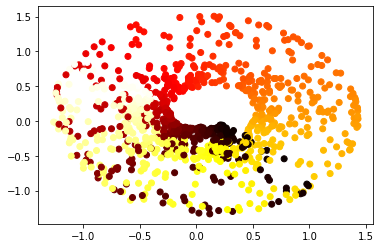

In [23]:
from sklearn.decomposition import KernelPCA

sig_pca = KernelPCA(n_components=2, kernel='sigmoid')
X_reduced = sig_pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)
plt.show() # Sigmoid kernel, gamma=10^(-3)

In [24]:
X[0]

array([-3.29677117,  4.26198454,  7.69787682])

In [25]:
y[0]

8.242346437921256

In [26]:
np.percentile(y, 50)

9.394688193610726

In [27]:
y_new = y > 9
y_new[:10]

array([False,  True,  True,  True, False, False, False,  True,  True,
        True])

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
  ('kpca', KernelPCA(n_components=2)),
  ('log_reg', LogisticRegression())
])

In [29]:
np.linspace(1, 10, 5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [30]:
param_grid = [
  {'kpca__gamma': np.linspace(0.03, 0.05, 10), 'kpca__kernel': ['rbf', 'sigmoid']}
]

In [31]:
from sklearn.model_selection import  GridSearchCV

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y_new)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [32]:
grid_search.best_params_

{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}

In [33]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.05, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimg = rbf_pca.inverse_transform(X_reduced)

In [34]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimg)

34.33553164498616

In [35]:
rbf_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.05, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimg = rbf_pca.inverse_transform(X_reduced)
mean_squared_error(X, X_preimg)

21.242715414426897

In [36]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

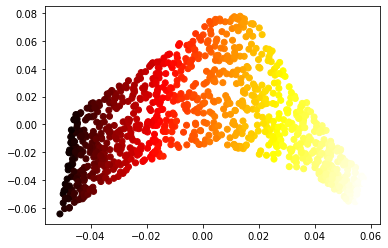

In [37]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)
plt.show()

In [38]:
# MNIST 데이터 가져오기

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

In [39]:
# 랜덤 포레스트 분류기 학습

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [40]:
# 학습 시간 측정

import time

start = time.time()
rnd_clf.fit(X_train, y_train)
end = time.time()

In [41]:
print("훈련 시간: {:.2f}s".format(end - start))

훈련 시간: 48.98s


In [42]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [ ]:
# PCA를 이용해서 RF의 학습시간과 평가결과를 출력해보세요!
# 커널 PCA도 다양하게 사용해서 RF의 학습시간과 평가결과를 출력해보세요!